## AutoML vs busy scientist Part II
The idea of this project is to go through a very basic ML project to show the ease and convininece of AutoML.<br>
I know sequels are rarely good but this time we have higher stakes... PIZZA!!!
When you wanna price your pizza service,
Who ya gonna call?
A lousy lazy data scientist or an AutoML library?

### Data Analysis
No more wasting time 
<br>lets see how the data looks 

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
#sns.color_palette("hls", 8)

In [198]:
df = pd.read_csv('/home/thayyeb/Desktop/Project/pizza_price/pizza_v2.csv')

In [199]:
df.head()

company price_rupiah diameter      topping           variant     size  \
0       A    Rp235,000  22 inch      chicken  double_signature    jumbo   
1       A    Rp198,000  20 inch    papperoni  double_signature    jumbo   
2       A    Rp120,000  16 inch    mushrooms  double_signature  reguler   
3       A    Rp155,000  14 inch  smoked_beef  double_signature  reguler   
4       A    Rp248,000  18 inch   mozzarella  double_signature    jumbo   

  extra_sauce extra_cheese extra_mushrooms  
0         yes          yes              no  
1         yes          yes              no  
2         yes          yes             yes  
3         yes           no             yes  
4         yes           no             yes

In [200]:
df.isnull().sum()

company            0
price_rupiah       0
diameter           0
topping            0
variant            0
size               0
extra_sauce        0
extra_cheese       0
extra_mushrooms    0
dtype: int64

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          129 non-null    object
 1   price_rupiah     129 non-null    object
 2   diameter         129 non-null    object
 3   topping          129 non-null    object
 4   variant          129 non-null    object
 5   size             129 non-null    object
 6   extra_sauce      129 non-null    object
 7   extra_cheese     129 non-null    object
 8   extra_mushrooms  129 non-null    object
dtypes: object(9)
memory usage: 9.2+ KB


In [202]:
df.rename({"price_rupiah":'price'}, axis = 1, inplace = True)
df

company      price  diameter      topping           variant     size  \
0         A  Rp235,000   22 inch      chicken  double_signature    jumbo   
1         A  Rp198,000   20 inch    papperoni  double_signature    jumbo   
2         A  Rp120,000   16 inch    mushrooms  double_signature  reguler   
3         A  Rp155,000   14 inch  smoked_beef  double_signature  reguler   
4         A  Rp248,000   18 inch   mozzarella  double_signature    jumbo   
..      ...        ...       ...          ...               ...      ...   
124       E   Rp39,000  8.5 inch         tuna        spicy tuna    small   
125       E   Rp72,000   12 inch         tuna        spicy tuna   medium   
126       E   Rp99,000   14 inch         tuna        spicy tuna    large   
127       E   Rp44,000  8.5 inch         meat   BBQ_meat_fiesta    small   
128       E   Rp78,000   12 inch         meat   BBQ_meat_fiesta   medium   

    extra_sauce extra_cheese extra_mushrooms  
0           yes          yes              no  
1           yes          yes              no  
2           yes          yes             yes  
3           yes           no             yes  
4           yes           no             yes  
..          ...          ...             ...  
124         yes          yes             yes  
125         yes          yes             yes  
126         yes          yes             yes  
127         yes           no             yes  
128          no           no             yes  

[129 rows x 9 columns]

In [203]:
df['price'] = df['price'].str.replace("Rp","").str.replace(",","").astype(int)
df['diameter'] = df['diameter'].str.replace(" inch","").astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   company          129 non-null    object 
 1   price            129 non-null    int64  
 2   diameter         129 non-null    float64
 3   topping          129 non-null    object 
 4   variant          129 non-null    object 
 5   size             129 non-null    object 
 6   extra_sauce      129 non-null    object 
 7   extra_cheese     129 non-null    object 
 8   extra_mushrooms  129 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 9.2+ KB


In [204]:
df.head()

company   price  diameter      topping           variant     size  \
0       A  235000      22.0      chicken  double_signature    jumbo   
1       A  198000      20.0    papperoni  double_signature    jumbo   
2       A  120000      16.0    mushrooms  double_signature  reguler   
3       A  155000      14.0  smoked_beef  double_signature  reguler   
4       A  248000      18.0   mozzarella  double_signature    jumbo   

  extra_sauce extra_cheese extra_mushrooms  
0         yes          yes              no  
1         yes          yes              no  
2         yes          yes             yes  
3         yes           no             yes  
4         yes           no             yes

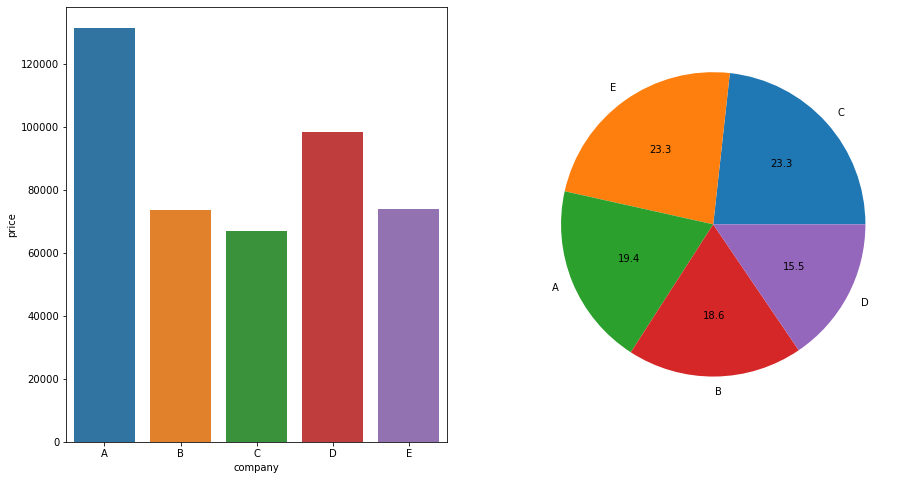

In [205]:
plt.figure(figsize = (15,8))
plt.subplot(1,2,1)
sns.barplot(x=df.groupby('company').mean().index, y=df.groupby('company').mean()['price'])
plt.subplot(1,2,2)
plt.pie(df['company'].value_counts(),autopct='%.1f',labels=df['company'].value_counts().index)
plt.show()

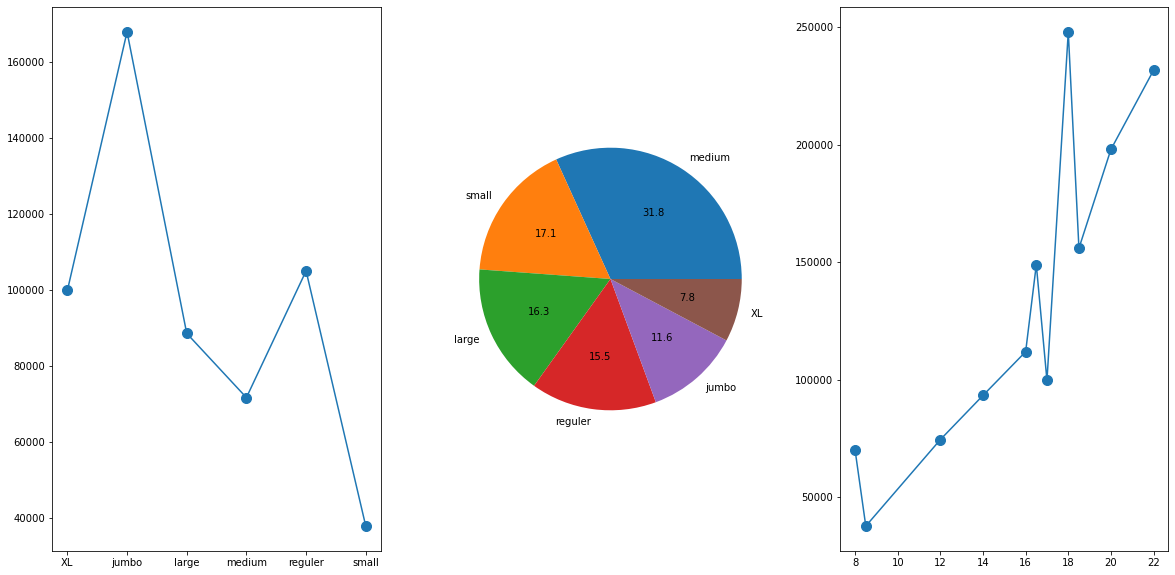

In [206]:
plt.figure(figsize = (20,10))
plt.subplot(1,3,1)
plt.plot(df.groupby('size').mean().index, df.groupby('size').mean()['price'], marker = 'o', markersize=10)
plt.subplot(1,3,2)
plt.pie(df['size'].value_counts(),autopct='%.1f',labels = df['size'].value_counts().index)
plt.subplot(1,3,3)
plt.plot(df.groupby('diameter').mean().index, df.groupby('diameter').mean()['price'],  marker = 'o', markersize=10)
plt.show()

#### Boys this is why we do EDA look at that scam! we shan't be scammed any more. Knowledge is power! 

<AxesSubplot:xlabel='price', ylabel='Count'>

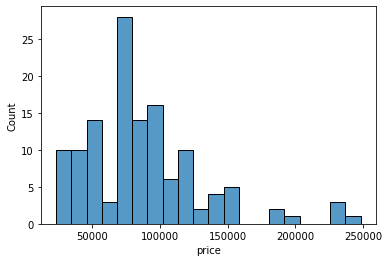

In [207]:
sns.histplot(data= df, x='price',bins=20)

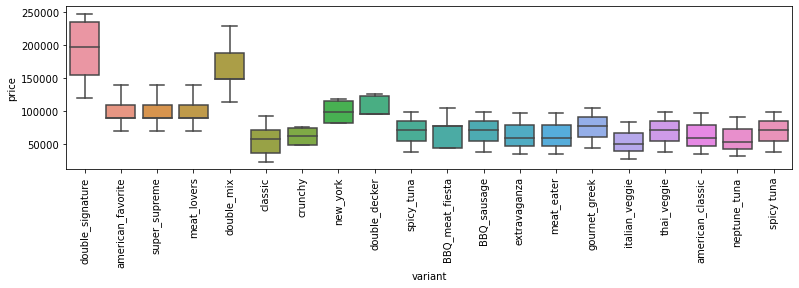

In [208]:
plt.figure(figsize=(13,3))
sns.boxplot(data = df, x='variant', y='price')
plt.xticks(rotation=90)
plt.show()

### Feature Engineering Magic
Lets dumb it down so the model can learn it better(not planning to make it too easy tho cause we are trying to do this fast)

In [209]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [210]:
categorical_cols = ['company', 'topping', 'variant', 'size', 'extra_sauce', 'extra_cheese', 'extra_mushrooms']
print(df.columns)
df_categorical = df[categorical_cols]
df_categorical 

Index(['company', 'price', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_mushrooms'],
      dtype='object')


company      topping           variant     size extra_sauce extra_cheese  \
0         A      chicken  double_signature    jumbo         yes          yes   
1         A    papperoni  double_signature    jumbo         yes          yes   
2         A    mushrooms  double_signature  reguler         yes          yes   
3         A  smoked_beef  double_signature  reguler         yes           no   
4         A   mozzarella  double_signature    jumbo         yes           no   
..      ...          ...               ...      ...         ...          ...   
124       E         tuna        spicy tuna    small         yes          yes   
125       E         tuna        spicy tuna   medium         yes          yes   
126       E         tuna        spicy tuna    large         yes          yes   
127       E         meat   BBQ_meat_fiesta    small         yes           no   
128       E         meat   BBQ_meat_fiesta   medium          no           no   

    extra_mushrooms  
0                no  
1                no  
2               yes  
3               yes  
4               yes  
..              ...  
124             yes  
125             yes  
126             yes  
127             yes  
128             yes  

[129 rows x 7 columns]

In [211]:
transformer = make_column_transformer((OneHotEncoder(), categorical_cols), remainder = 'passthrough')
transformed = transformer.fit_transform(df_categorical).toarray()
transformed

array([[1., 0., 0., ..., 1., 1., 0.],
       [1., 0., 0., ..., 1., 1., 0.],
       [1., 0., 0., ..., 1., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [212]:
transformer.get_feature_names_out

<bound method ColumnTransformer.get_feature_names_out of ColumnTransformer(remainder='passthrough',
                  transformers=[('onehotencoder', OneHotEncoder(),
                                 ['company', 'topping', 'variant', 'size',
                                  'extra_sauce', 'extra_cheese',
                                  'extra_mushrooms'])])>

In [213]:
transformed_df = pd.DataFrame(transformed, columns = transformer.get_feature_names_out())
transformed_df

onehotencoder__company_A  onehotencoder__company_B  \
0                         1.0                       0.0   
1                         1.0                       0.0   
2                         1.0                       0.0   
3                         1.0                       0.0   
4                         1.0                       0.0   
..                        ...                       ...   
124                       0.0                       0.0   
125                       0.0                       0.0   
126                       0.0                       0.0   
127                       0.0                       0.0   
128                       0.0                       0.0   

     onehotencoder__company_C  onehotencoder__company_D  \
0                         0.0                       0.0   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                       0.0   
..                        ...                       ...   
124                       0.0                       0.0   
125                       0.0                       0.0   
126                       0.0                       0.0   
127                       0.0                       0.0   
128                       0.0                       0.0   

     onehotencoder__company_E  onehotencoder__topping_beef  \
0                         0.0                          0.0   
1                         0.0                          0.0   
2                         0.0                          0.0   
3                         0.0                          0.0   
4                         0.0                          0.0   
..                        ...                          ...   
124                       1.0                          0.0   
125                       1.0                          0.0   
126                       1.0                          0.0   
127                       1.0                          0.0   
128                       1.0                          0.0   

     onehotencoder__topping_black_papper  onehotencoder__topping_chicken  \
0                                    0.0                             1.0   
1                                    0.0                             0.0   
2                                    0.0                             0.0   
3                                    0.0                             0.0   
4                                    0.0                             0.0   
..                                   ...                             ...   
124                                  0.0                             0.0   
125                                  0.0                             0.0   
126                                  0.0                             0.0   
127                                  0.0                             0.0   
128                                  0.0                             0.0   

     onehotencoder__topping_meat  onehotencoder__topping_mozzarella  ...  \
0                            0.0                                0.0  ...   
1                            0.0                                0.0  ...   
2                            0.0                                0.0  ...   
3                            0.0                                0.0  ...   
4                            0.0                                1.0  ...   
..                           ...                                ...  ...   
124                          0.0                                0.0  ...   
125                          0.0                                0.0  ...   
126                          0.0                                0.0  ...   
127                          1.0                                0.0  ...   
128                          1.0                                0.0  ...   

     onehotencod

In [214]:
#transformed_df.iloc[0],df_categorical.iloc[0]

In [215]:
df.drop(categorical_cols,axis=1,inplace=True)
df = pd.concat([df,transformed_df], axis = 1)
df.head()

price  diameter  onehotencoder__company_A  onehotencoder__company_B  \
0  235000      22.0                       1.0                       0.0   
1  198000      20.0                       1.0                       0.0   
2  120000      16.0                       1.0                       0.0   
3  155000      14.0                       1.0                       0.0   
4  248000      18.0                       1.0                       0.0   

   onehotencoder__company_C  onehotencoder__company_D  \
0                       0.0                       0.0   
1                       0.0                       0.0   
2                       0.0                       0.0   
3                       0.0                       0.0   
4                       0.0                       0.0   

   onehotencoder__company_E  onehotencoder__topping_beef  \
0                       0.0                          0.0   
1                       0.0                          0.0   
2                       0.0                          0.0   
3                       0.0                          0.0   
4                       0.0                          0.0   

   onehotencoder__topping_black_papper  onehotencoder__topping_chicken  ...  \
0                                  0.0                             1.0  ...   
1                                  0.0                             0.0  ...   
2                                  0.0                             0.0  ...   
3                                  0.0                             0.0  ...   
4                                  0.0                             0.0  ...   

   onehotencoder__size_large  onehotencoder__size_medium  \
0                        0.0                         0.0   
1                        0.0                         0.0   
2                        0.0                         0.0   
3                        0.0                         0.0   
4                        0.0                         0.0   

   onehotencoder__size_reguler  onehotencoder__size_small  \
0                          0.0                        0.0   
1                          0.0                        0.0   
2                          1.0                        0.0   
3                          1.0                        0.0   
4                          0.0                        0.0   

   onehotencoder__extra_sauce_no  onehotencoder__extra_sauce_yes  \
0                            0.0                             1.0   
1                            0.0                             1.0   
2                            0.0                             1.0   
3                            0.0                             1.0   
4                            0.0                             1.0   

   onehotencoder__extra_cheese_no  onehotencoder__extra_cheese_yes  \
0                             0.0                              1.0   
1                             0.0                              1.0   
2                             0.0                              1.0   
3                             1.0                              0.0   
4                             1.0                              0.0   

   onehotencoder__extra_mushrooms_no  onehotencoder__extra_mushrooms_yes  
0                                1.0                                 0.0  
1                                1.0                                 0.0  
2                                0.0                                 1.0  
3                                0.0                                 1.0  
4                                0.0                                 1.0  

[5 rows x 51 columns]

In [216]:
#df.dtypes

In [217]:
X = df.drop('price', axis = 1)
y = df['price']

In [218]:
from sklearn.model_selection import train_test_split

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### Linear Regression
lets try a few different models, and try not to give the AI our pizza pricing jobs

In [220]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [221]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
lin_pred = linreg.predict(X_test)

In [222]:
def metric_scores(pred, test):
    mae = mean_absolute_error(pred, test)
    rmse = mean_squared_error(pred, test, squared = False)
    r2score = r2_score(pred, test)

    print(f"MAE:{mae:.2f}\nRMSE:{rmse:.2f}\nR2score:{r2score*100:.2f}")

In [223]:
metric_scores(lin_pred, y_test)

MAE:13299.06
RMSE:17152.73
R2score:88.53


### SVR

In [224]:
from sklearn.svm import SVR

In [225]:
svr = SVR(kernel = 'rbf')
svr.fit(X_train, y_train)

SVR()

In [226]:
svr_pred = svr.predict(X_test)

In [227]:
metric_scores(svr_pred,y_test)

MAE:38071.64
RMSE:50484.61
R2score:-6310615562.49


Oh boy!

### XGB Regressor
Let's give the best contender some extra boost with GridSearchCV

In [230]:
from xgboost import XGBRegressor
#from sklearn.model_selection import GridSearchCV

In [231]:
"""
param_grid = {'n_estimators' : [100,250,500],
              'max_depth' : [3, 4, 5, 6],
              'learning_rate' : [0.01, 0.1, 0.2]
             }
This is gonna take a bit too much time so lets spare you that
"""

"\nparam_grid = {'n_estimators' : [100,250,500],\n              'max_depth' : [3, 4, 5, 6],\n              'learning_rate' : [0.01, 0.1, 0.2]\n             }\nThis is gonna take a bit too much time so lets spare you that\n"

In [245]:
#final = GridSearchCV(XGBRegressor(), param_grid = param_grid,scoring = 'r2')

In [233]:
#final.fit(X_train, y_train, verbose = 1) #this might be slow 

In [234]:
#final.best_params_

In [235]:
xgb = XGBRegressor(learning_rate = 0.2, max_depth = 6, n_estimators = 6000, verbose = 1)

In [236]:
xgb.fit(X_train, y_train)

[02:18:21] WARNING: ../src/learner.cc:576: 
Parameters: { "verbose" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.2, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=6000, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbose=1, verbosity=None)

In [237]:
xgb_pred = xgb.predict(X_test)

In [238]:
metric_scores(xgb_pred, y_test)

MAE:2919.64
RMSE:5593.01
R2score:98.65


#### This bad boi looks good and I could use it. Now I know why everyone is going mad for this on Kaggle 

## AutoML
Lets have the challenger show his pizza pricing skills now

In [176]:
import evalml

In [177]:
X_train, X_test, y_train, y_test = evalml.preprocessing.split_data(X, y, problem_type = 'regression')

In [178]:
from evalml import AutoMLSearch

In [179]:
automl = AutoMLSearch(X_train = X_train, y_train = y_train, problem_type='regression', verbose = 1)
automl.search()

Using default limit of max_batches=4.


*****************************
* Beginning pipeline search *
*****************************

Optimizing for R2. 
Greater score is better.

Using SequentialEngine to train and score pipelines.
Searching up to 4 batches for a total of None pipelines. 
Allowed model families: 



FigureWidget({
    'data': [{'mode': 'lines+markers',
              'name': 'Best Score',
              'type'…

Evaluating Baseline Pipeline: Mean Baseline Regression Pipeline
Mean Baseline Regression Pipeline:
	Starting cross validation
	Finished cross validation - mean R2: -0.004

*****************************
* Evaluating Batch Number 1 *
*****************************



/home/thayyeb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.120e+09, tolerance: 1.422e+07

/home/thayyeb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.261e+09, tolerance: 1.508e+07



Elastic Net Regressor w/ Imputer + Standard Scaler:
	Starting cross validation
	Finished cross validation - mean R2: 0.780


/home/thayyeb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.658e+09, tolerance: 1.704e+07



Random Forest Regressor w/ Imputer:
	Starting cross validation
	Finished cross validation - mean R2: 0.853

*****************************
* Evaluating Batch Number 2 *
*****************************



/home/thayyeb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.302e+09, tolerance: 1.422e+07

/home/thayyeb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.207e+09, tolerance: 1.508e+07



Elastic Net Regressor w/ Imputer + Standard Scaler + RF Regressor Select From Model:
	Starting cross validation
	Finished cross validation - mean R2: 0.838


/home/thayyeb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.098e+09, tolerance: 1.704e+07



Random Forest Regressor w/ Imputer + RF Regressor Select From Model:
	Starting cross validation
	Finished cross validation - mean R2: 0.850

*****************************
* Evaluating Batch Number 3 *
*****************************

Decision Tree Regressor w/ Imputer + Select Columns Transformer:
	Starting cross validation
	Finished cross validation - mean R2: 0.861
Extra Trees Regressor w/ Imputer + Select Columns Transformer:
	Starting cross validation
	Finished cross validation - mean R2: 0.823
XGBoost Regressor w/ Imputer + Select Columns Transformer:
	Starting cross validation
	Finished cross validation - mean R2: 0.904
CatBoost Regressor w/ Imputer + Select Columns Transformer:
	Starting cross validation
	Finished cross validation - mean R2: 0.157
LightGBM Regressor w/ Imputer + Select Columns Transformer:
	Starting cross validation
	Finished cross validation - mean R2: 0.360

*****************************
* Evaluating Batch Number 4 *
*****************************



/home/thayyeb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.321e+07, tolerance: 1.422e+07

/home/thayyeb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.625e+08, tolerance: 1.508e+07

/home/thayyeb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.312e+08, tolerance: 1.704e+07



Stacked Ensemble Regression Pipeline:
	Starting cross validation
	Finished cross validation - mean R2: 0.898

Search finished after 00:18            
Best pipeline: XGBoost Regressor w/ Imputer + Select Columns Transformer
Best pipeline R2: 0.903592


In [180]:
automl.rankings

id                                      pipeline_name  search_order  \
0    7  XGBoost Regressor w/ Imputer + Select Columns ...             7   
1   10               Stacked Ensemble Regression Pipeline            10   
2    5  Decision Tree Regressor w/ Imputer + Select Co...             5   
3    2                 Random Forest Regressor w/ Imputer             2   
4    4  Random Forest Regressor w/ Imputer + RF Regres...             4   
5    3  Elastic Net Regressor w/ Imputer + Standard Sc...             3   
6    6  Extra Trees Regressor w/ Imputer + Select Colu...             6   
7    1  Elastic Net Regressor w/ Imputer + Standard Sc...             1   
8    9  LightGBM Regressor w/ Imputer + Select Columns...             9   
9    8  CatBoost Regressor w/ Imputer + Select Columns...             8   
10   0                  Mean Baseline Regression Pipeline             0   

    mean_cv_score  standard_deviation_cv_score  validation_score  \
0        0.903592                     0.071110          0.903592   
1        0.897771                     0.073510          0.897771   
2        0.861280                     0.113869          0.861280   
3        0.852980                     0.090333          0.852980   
4        0.850043                     0.089019          0.850043   
5        0.838305                     0.060231          0.838305   
6        0.823130                     0.057658          0.823130   
7        0.779511                     0.067756          0.779511   
8        0.359802                     0.021041          0.359802   
9        0.157341                     0.032128          0.157341   
10      -0.003676                     0.002663         -0.003676   

    percent_better_than_baseline  high_variance_cv  \
0                   24682.059983             False   
1                   24523.698040             False   
2                   23530.959193             False   
3                   23305.168414             False   
4                   23225.249041             False   
5                   22905.936808             False   
6                   22493.100997             False   
7                   21306.441075             False   
8                    9888.343887             False   
9                    4380.436136             False   
10                      0.000000             False   

                                           parameters  
0   {'Imputer': {'categorical_impute_strategy': 'm...  
1   {'Linear Pipeline - Imputer': {'categorical_im...  
2   {'Imputer': {'categorical_impute_strategy': 'm...  
3   {'Imputer': {'categorical_impute_strategy': 'm...  
4   {'Imputer': {'categorical_impute_strategy': 'm...  
5   {'Imputer': {'categorical_impute_strategy': 'm...  
6   {'Imputer': {'categorical_impute_strategy': 'm...  
7   {'Imputer': {'categorical_impute_strategy': 'm...  
8   {'Imputer': {'categorical_impute_strategy': 'm...  
9   {'Imputer': {'categorical_impute_strategy': 'm...  
10       {'Baseline Regressor': {'strategy': 'mean'}}

In [181]:
bestpipeline = automl.best_pipeline
automl.describe_pipeline(automl.rankings.iloc[0]['id'])


*************************************************************
* XGBoost Regressor w/ Imputer + Select Columns Transformer *
*************************************************************

Problem Type: regression
Model Family: XGBoost

Pipeline Steps
1. Imputer
	 * categorical_impute_strategy : most_frequent
	 * numeric_impute_strategy : mean
	 * categorical_fill_value : None
	 * numeric_fill_value : None
2. Select Columns Transformer
	 * columns : ['diameter', 'onehotencoder__company_A', 'onehotencoder__company_B', 'onehotencoder__company_C', 'onehotencoder__company_D', 'onehotencoder__topping_black_papper', 'onehotencoder__topping_chicken', 'onehotencoder__topping_meat', 'onehotencoder__topping_mozzarella', 'onehotencoder__topping_mushrooms', 'onehotencoder__topping_papperoni', 'onehotencoder__topping_smoked_beef', 'onehotencoder__variant_classic', 'onehotencoder__variant_double_decker', 'onehotencoder__variant_double_mix', 'onehotencoder__variant_double_signature', 'onehotencoder__s

In [182]:
bestpipeline.score(X_test, y_test, objectives = ['R2'])

OrderedDict([('R2', 0.9211737023058698)])

In [239]:
automl_r2 = AutoMLSearch(X_train = X_train, y_train = y_train, 
                         problem_type = 'regression',
                         objective = 'R2',
                         optimize_thresholds = True,
                         verbose = 1)

Using default limit of max_batches=4.



In [240]:
automl_r2.search()


*****************************
* Beginning pipeline search *
*****************************

Optimizing for R2. 
Greater score is better.

Using SequentialEngine to train and score pipelines.
Searching up to 4 batches for a total of None pipelines. 
Allowed model families: 



FigureWidget({
    'data': [{'mode': 'lines+markers',
              'name': 'Best Score',
              'type'…

Evaluating Baseline Pipeline: Mean Baseline Regression Pipeline
Mean Baseline Regression Pipeline:
	Starting cross validation
	Finished cross validation - mean R2: -0.021

*****************************
* Evaluating Batch Number 1 *
*****************************



/home/thayyeb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.258e+09, tolerance: 1.161e+07

/home/thayyeb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.590e+09, tolerance: 1.342e+07



Elastic Net Regressor w/ Imputer + Standard Scaler:
	Starting cross validation
	Finished cross validation - mean R2: 0.686


/home/thayyeb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.035e+09, tolerance: 1.354e+07



Random Forest Regressor w/ Imputer:
	Starting cross validation
	Finished cross validation - mean R2: 0.842

*****************************
* Evaluating Batch Number 2 *
*****************************



/home/thayyeb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.096e+09, tolerance: 1.161e+07

/home/thayyeb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.149e+09, tolerance: 1.342e+07



Elastic Net Regressor w/ Imputer + Standard Scaler + RF Regressor Select From Model:
	Starting cross validation
	Finished cross validation - mean R2: 0.755


/home/thayyeb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.542e+09, tolerance: 1.354e+07



Random Forest Regressor w/ Imputer + RF Regressor Select From Model:
	Starting cross validation
	Finished cross validation - mean R2: 0.847

*****************************
* Evaluating Batch Number 3 *
*****************************

Decision Tree Regressor w/ Imputer + Select Columns Transformer:
	Starting cross validation
	Finished cross validation - mean R2: 0.857
Extra Trees Regressor w/ Imputer + Select Columns Transformer:
	Starting cross validation
	Finished cross validation - mean R2: 0.725
XGBoost Regressor w/ Imputer + Select Columns Transformer:
	Starting cross validation
	Finished cross validation - mean R2: 0.850
CatBoost Regressor w/ Imputer + Select Columns Transformer:
	Starting cross validation
	Finished cross validation - mean R2: 0.127
LightGBM Regressor w/ Imputer + Select Columns Transformer:
	Starting cross validation
	Finished cross validation - mean R2: 0.317

*****************************
* Evaluating Batch Number 4 *
*****************************



/home/thayyeb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.574e+07, tolerance: 1.161e+07

/home/thayyeb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.789e+08, tolerance: 1.342e+07

/home/thayyeb/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.880e+07, tolerance: 1.354e+07



Stacked Ensemble Regression Pipeline:
	Starting cross validation
	Finished cross validation - mean R2: 0.847

Search finished after 00:17            
Best pipeline: Decision Tree Regressor w/ Imputer + Select Columns Transformer
Best pipeline R2: 0.857365


In [241]:
automl_r2.rankings

id                                      pipeline_name  search_order  \
0    5  Decision Tree Regressor w/ Imputer + Select Co...             5   
1    7  XGBoost Regressor w/ Imputer + Select Columns ...             7   
2   10               Stacked Ensemble Regression Pipeline            10   
3    4  Random Forest Regressor w/ Imputer + RF Regres...             4   
4    2                 Random Forest Regressor w/ Imputer             2   
5    3  Elastic Net Regressor w/ Imputer + Standard Sc...             3   
6    6  Extra Trees Regressor w/ Imputer + Select Colu...             6   
7    1  Elastic Net Regressor w/ Imputer + Standard Sc...             1   
8    9  LightGBM Regressor w/ Imputer + Select Columns...             9   
9    8  CatBoost Regressor w/ Imputer + Select Columns...             8   
10   0                  Mean Baseline Regression Pipeline             0   

    mean_cv_score  standard_deviation_cv_score  validation_score  \
0        0.857365                     0.077571          0.857365   
1        0.850024                     0.071734          0.850024   
2        0.847357                     0.071175          0.847357   
3        0.847117                     0.111770          0.847117   
4        0.841830                     0.106235          0.841830   
5        0.754924                     0.112671          0.754924   
6        0.724684                     0.025218          0.724684   
7        0.686014                     0.071274          0.686014   
8        0.316921                     0.061198          0.316921   
9        0.126969                     0.063604          0.126969   
10      -0.021125                     0.015809         -0.021125   

    percent_better_than_baseline  high_variance_cv  \
0                    4158.571075             False   
1                    4123.817996             False   
2                    4111.194522             False   
3                    4110.060735             False   
4                    4085.033146             False   
5                    3673.639595             False   
6                    3530.486488             False   
7                    3347.435255             False   
8                    1600.232269             False   
9                     701.040694             False   
10                      0.000000             False   

                                           parameters  
0   {'Imputer': {'categorical_impute_strategy': 'm...  
1   {'Imputer': {'categorical_impute_strategy': 'm...  
2   {'Linear Pipeline - Imputer': {'categorical_im...  
3   {'Imputer': {'categorical_impute_strategy': 'm...  
4   {'Imputer': {'categorical_impute_strategy': 'm...  
5   {'Imputer': {'categorical_impute_strategy': 'm...  
6   {'Imputer': {'categorical_impute_strategy': 'm...  
7   {'Imputer': {'categorical_impute_strategy': 'm...  
8   {'Imputer': {'categorical_impute_strategy': 'm...  
9   {'Imputer': {'categorical_impute_strategy': 'm...  
10       {'Baseline Regressor': {'strategy': 'mean'}}

In [242]:
bestpipeline = automl_r2.best_pipeline

In [243]:
bestpipeline.score(X_test, y_test, objectives = ['r2'])

OrderedDict([('R2', 0.949550290059891)])

In [244]:
print(f" Auto ML r2 score {bestpipeline.score(X_test,y_test, objectives=['R2'])['R2']*100:.2f} vs XGboost r2 Score {r2_score(xgb_pred,y_test)*100:.2f}")

 Auto ML r2 score 94.96 vs XGboost r2 Score 98.65


It did take me a while to find the best parameters for the XGBoost model 
#### My winner looks like XGBoost! but AutoML looked like a worthy opponent
Cue victory music<br>
Now you know,<br>
who ya gonna call!<br>
Feel free to share your opinions.<br>
That makes it Humans 1 - 1 Robots, if you're keeping track<br>
Thank you for your time 